In [1]:
%load_ext autoreload

%autoreload 2

In [127]:
import os
from glob import glob
import subprocess
import shutil
import traceback
import random
import pickle
from os.path import join

import joblib
from concurrent.futures import ProcessPoolExecutor

from backports import tempfile

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams["image.composite_image"]=False
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import psrchive

import pipe

plt.viridis()

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [44]:
pipe.process_observation("data/obs/56128.46_GBT_1400", "test1",
                         work_dir="/tmp/triple-pipeline-test")

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test/raw_0000.ar'], {'output': '/tmp/triple-pipeline-test/align_0000.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56128.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test/align_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test/raw_0000.ar with keyword output=/tmp/triple-pipeline-test/align_0000.ar


/tmp/triple-pipeline-test/align_0000.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test/cal_0000.ar', '-F', '1100 1150', '-F', '1250 1262', '-F', '1288 1300', '-F', '1373 1381', '-F', '1442 1447', '-F', '1525 1558', '-F', '1575 1577', '-F', '1615 1630', '-F', '1370 1385'], {'output': '/tmp/triple-pipeline-test/zaptemp_0000.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test/zaptemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test/cal_0000.ar with keyword output=/tmp/triple-pipeline-test/zaptemp_0000.ar
INFO:root:Zapping subintegrations in keyhole: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 

Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 16 22 23 25 26 29 30 95 96 104 105 205 222 223 279 280 281 282 283 285 286 287 289 304 305 319 320 322 323 324 325 332 333 334 335 336 337 338 503 504 505 506 507 508 509 510 511"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 15 16 22 23 25 26 29 30 95 96 104 105 205 222 223 279 280 281 282 283 285 286 287 289 291 292 293 304 305 319 320 322 323 324 325 332 333 335 336 337 338 503 504 505 506 507 508 509 510 511"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 13 16 22 23 29 30 95 96 104 105 205 222 223 279 280 281 282 283 284 285 286 287 288 289 291 292 293 304 305 319 320 322 323 324 325 332 333 334 335 336 337 338 503 504 505 506 507 508 509 510 511"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 16 22 23 29 30 95 96 104 105 205 222 223 279 280 281 282 283 285 286 287 288 291 292 293 294 304 305 319 320 322 323 324 325 332 333 334 335 336 337 338 503 504 505 506 507 508 509 510 511"
Equivalent

INFO:root:Output /tmp/triple-pipeline-test/zaptemp2_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test/zaptemp_0000.ar with keyword output=/tmp/triple-pipeline-test/zaptemp2_0000.ar


Updating /tmp/triple-pipeline-test/zaptemp2_0000.ar ... done


ProcHistory::set_command_str WARNING truncated to 256 chars
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test/zap_0000.ar'], {'setnchn': 1, 'output': '/tmp/triple-pipeline-test/scrunchtemp_0000.ar'}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test/scrunchtemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test/zap_0000.ar with keyword output=/tmp/triple-pipeline-test/scrunchtemp_0000.ar
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test/scrunchadd_0000.ar'], {'output': '/tmp/triple-pipeline-test/scrunch_0000.ar', 'setnsub': 256}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test/scrunch_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test/scrunchadd_0000.ar with keyword output=/tmp/triple-pipeline-test/scrunch_0000.ar


/tmp/triple-pipeline-test/scrunchtemp_0000.ar written to disk


DEBUG:root:Scrunch requested 1 channels from 512 got 1
DEBUG:root:Scrunch requested 256 subints from 256 got 256


/tmp/triple-pipeline-test/scrunch_0000.ar written to disk


NameError: global name 'make_summary_plots' is not defined

In [134]:
pipe.process_observation("data/obs/56142.50_GBT_1400",
                         work_dir="/tmp/triple-pipeline-test-2")

TypeError: process_observation() takes at least 2 arguments (2 given)

In [140]:
pipe.process_observation("data/obs/55956.63_WSRT_1400", "wideband",
                         work_dir="/tmp/triple-pipeline-test-4")

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test-4/raw_0000.ar'], {'output': '/tmp/triple-pipeline-test-4/align_0000.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/55956.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test-4/align_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test-4/raw_0000.ar with keyword output=/tmp/triple-pipeline-test-4/align_0000.ar
INFO:root:Zapping ['/tmp/triple-pipeline-test-4/cal_0000.ar']
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test-4/cal_0000.ar'], {'output': '/tmp/triple-pipeline-test-4/zaptemp_0000.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test-4/zaptemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test-4/cal_0000.ar with keyword output=/tmp/triple-pipeline-test-4/zaptemp_0000.ar


/tmp/triple-pipeline-test-4/align_0000.ar written to disk
Using median smoothed difference zapper
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Equivalent paz cmd: paz -z ""
Eq

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test-4/zap_0000.ar'], {'setnchn': 1, 'output': '/tmp/triple-pipeline-test-4/scrunchtemp_0000.ar'}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test-4/scrunchtemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test-4/zap_0000.ar with keyword output=/tmp/triple-pipeline-test-4/scrunchtemp_0000.ar


/tmp/triple-pipeline-test-4/scrunchtemp_0000.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/triple-pipeline-test-4/scrunchadd_0000.ar'], {'output': '/tmp/triple-pipeline-test-4/scrunch_0000.ar', 'setnsub': 59.0}) != ([], {})
INFO:root:Output /tmp/triple-pipeline-test-4/scrunch_0000.ar missing
DEBUG:root:Inplace replacing position 0=/tmp/triple-pipeline-test-4/scrunchadd_0000.ar with keyword output=/tmp/triple-pipeline-test-4/scrunch_0000.ar
DEBUG:root:Scrunch requested 1 channels from 512 got 1
DEBUG:root:Scrunch requested 59 subints from 59 got 59


/tmp/triple-pipeline-test-4/scrunch_0000.ar written to disk


In [135]:
pipe.process_observation("data/obs/56117.50_AO_1400", "wideband",
                         work_dir="/tmp/triple-pipeline-test-3")

/tmp/triple-pipeline-test-3/align_0000.ar written to disk
/tmp/triple-pipeline-test-3/align_0001.ar written to disk
/tmp/triple-pipeline-test-3/align_0002.ar written to disk
/tmp/triple-pipeline-test-3/align_0003.ar written to disk
/tmp/triple-pipeline-test-3/align_0004.ar written to disk
Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 67 68 95 98 99 101 104 105 111 112 113 131 132 149 150 326 350 408 409 410 411 414 428 429 430 432 434 435 442 443 445 446 450 451 455 456 458 459 461 462 466 467 474 475 482 483 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 51 52 67 98 99 101 102 104 105 111 112 113 131 132 148 149 150 156 157 275 288 326 340 341 342 350 351 408 409 410 411 414 428 429 430 432 433 434 435 442 443 450 451 455 456 458 459 461 462 466 467 474 475 482 483 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511"
Equivalent paz cmd: paz -z "0 1 2 3 4 5 6 7 8 9 51 52 67 6

ERROR:root:Metadata claims 31 subints but files contain 287 for observation 56117.50_AO_1400; overriding
DEBUG:root:Scrunch requested 1 channels from 512 got 1
DEBUG:root:Scrunch requested 287 subints from 287 got 287


/tmp/triple-pipeline-test-3/scrunchtemp_0000.ar written to disk
/tmp/triple-pipeline-test-3/scrunchtemp_0001.ar written to disk
/tmp/triple-pipeline-test-3/scrunchtemp_0002.ar written to disk
/tmp/triple-pipeline-test-3/scrunchtemp_0003.ar written to disk
/tmp/triple-pipeline-test-3/scrunchtemp_0004.ar written to disk
/tmp/triple-pipeline-test-3/scrunch_0000.ar written to disk


In [139]:
pipe.process_observation("data/obs/56479.20_WSRT_350", "wideband",
                         work_dir="/data/archibald/scratch/triple-pipeline-test-5")

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triple-pipeline-test-5/raw_0000.ar'], {'output': '/data/archibald/scratch/triple-pipeline-test-5/align_0000.ar', 'E': '/psr_archive/hessels/archibald/0337+17/ephemerides/56480.par', 'ephver': 'tempo'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triple-pipeline-test-5/align_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triple-pipeline-test-5/raw_0000.ar with keyword output=/data/archibald/scratch/triple-pipeline-test-5/align_0000.ar


/data/archibald/scratch/triple-pipeline-test-5/align_0000.ar written to disk


INFO:root:Zapping ['/data/archibald/scratch/triple-pipeline-test-5/cal_0000.ar']
INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triple-pipeline-test-5/cal_0000.ar'], {'output': '/data/archibald/scratch/triple-pipeline-test-5/zaptemp_0000.ar', 'R': 20, 'r': None}) != ([], {})
INFO:root:Output /data/archibald/scratch/triple-pipeline-test-5/zaptemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triple-pipeline-test-5/cal_0000.ar with keyword output=/data/archibald/scratch/triple-pipeline-test-5/zaptemp_0000.ar


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "440 448 450 453 454"
Equivalent paz cmd: paz -z "4

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triple-pipeline-test-5/zap_0000.ar'], {'setnchn': 1, 'output': '/data/archibald/scratch/triple-pipeline-test-5/scrunchtemp_0000.ar'}) != ([], {})
INFO:root:Output /data/archibald/scratch/triple-pipeline-test-5/scrunchtemp_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triple-pipeline-test-5/zap_0000.ar with keyword output=/data/archibald/scratch/triple-pipeline-test-5/scrunchtemp_0000.ar


/data/archibald/scratch/triple-pipeline-test-5/scrunchtemp_0000.ar written to disk


INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/data/archibald/scratch/triple-pipeline-test-5/scrunchadd_0000.ar'], {'output': '/data/archibald/scratch/triple-pipeline-test-5/scrunch_0000.ar', 'setnsub': 1799.0}) != ([], {})
INFO:root:Output /data/archibald/scratch/triple-pipeline-test-5/scrunch_0000.ar missing
DEBUG:root:Inplace replacing position 0=/data/archibald/scratch/triple-pipeline-test-5/scrunchadd_0000.ar with keyword output=/data/archibald/scratch/triple-pipeline-test-5/scrunch_0000.ar
DEBUG:root:Scrunch requested 1 channels from 512 got 1
DEBUG:root:Scrunch requested 1799 subints from 1799 got 1799


/data/archibald/scratch/triple-pipeline-test-5/scrunch_0000.ar written to disk


PSR J0337+1715 observation 56117.50_AO_1400
Observed with:	AO lbw
Center frequency:	1380.78125 MHz
Length:	2938.70722214 s
Bandwidth:	-800.0 MHz
Maximum smearing:	0 turns
Signal-to-noise ratio (RMS):	not yet implemented



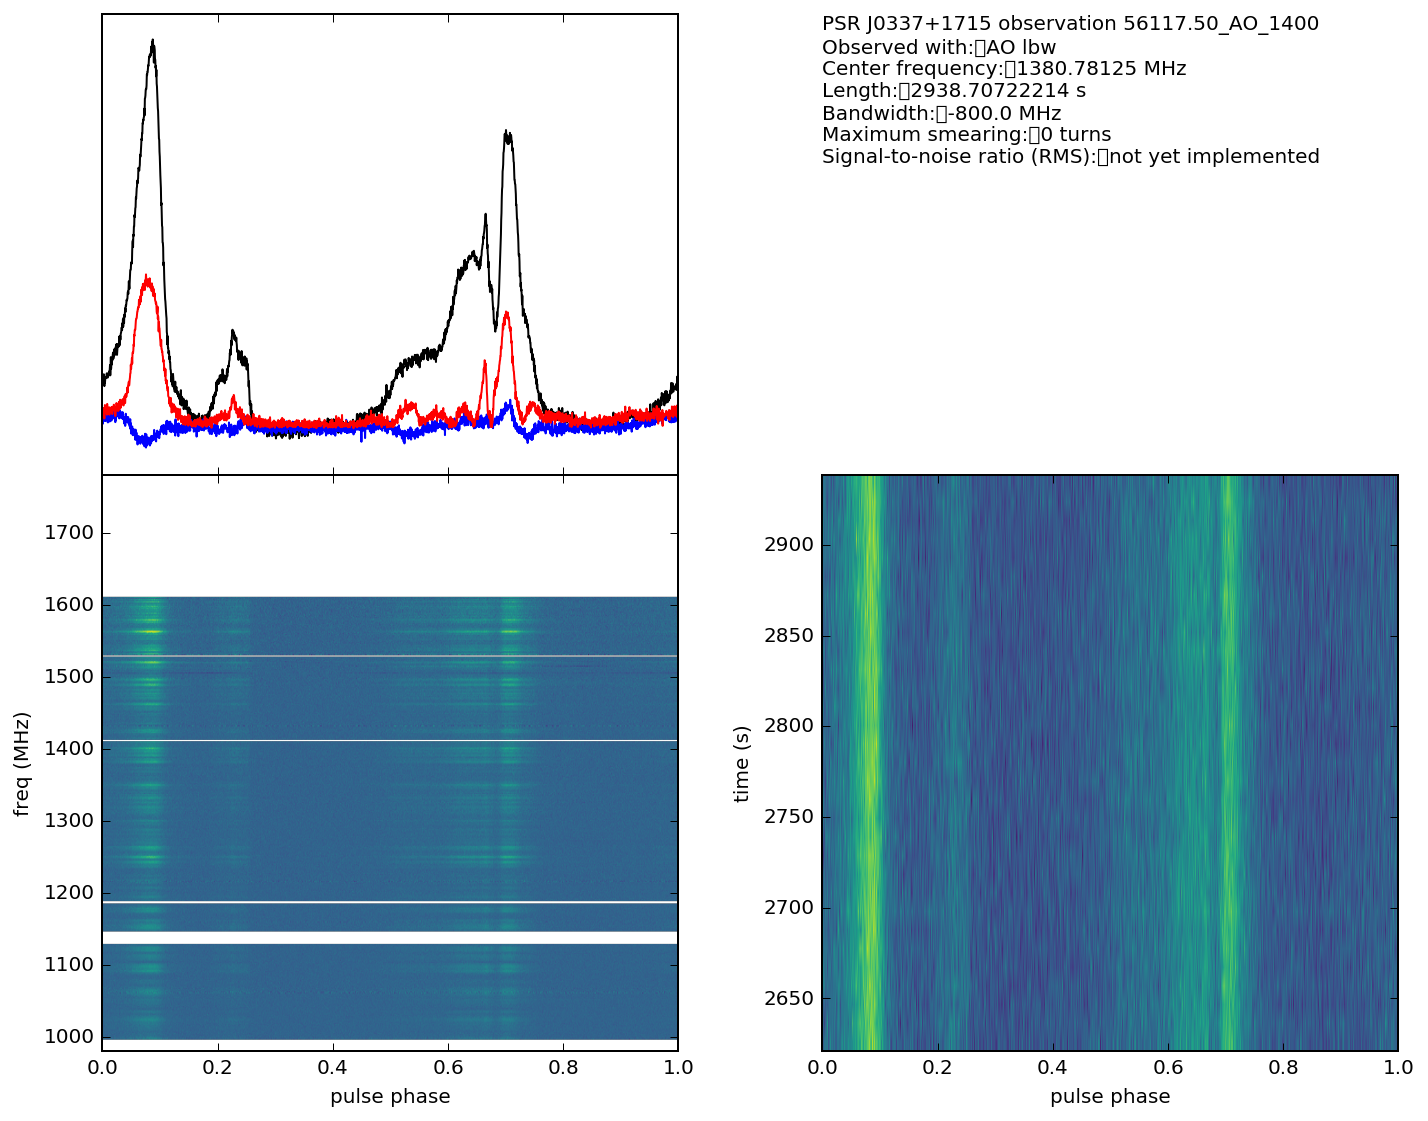

In [128]:
work_dir = "/tmp/triple-pipeline-test-3"

fig = plt.figure()
fig.set_size_inches(10,8)

prof = plt.axes((0.05,0.55,0.4,0.4))
gtp = plt.axes((0.05,0.05,0.4,0.5))
yfp = plt.axes((0.55,0.05,0.4,0.5))
text_x, text_y = 0.55, 0.95

with open(join(work_dir,"process.pickle"),"rb") as f:
    meta = pickle.load(f)

text = """PSR J0337+1715 observation {name}
Observed with:\t{tel} {receiver}
Center frequency:\t{centre_frequency} MHz
Length:\t{length} s
Bandwidth:\t{bw} MHz
Maximum smearing:\t{max_smearing} turns
Signal-to-noise ratio (RMS):\tnot yet implemented
""".format(**meta)

print text
plt.text(text_x, text_y, text, 
         horizontalalignment="left", verticalalignment="top",
         transform=fig.transFigure)

unscrunched = sorted(glob(join(work_dir, "zap_*.ar")))
scrunched = sorted(glob(join(work_dir, "scrunch_*.ar")))
gtp_data = None
prof_data = None
std_data = 0
for s in scrunched:
    F = psrchive.Archive_load(s)
    F.fscrunch()
    F.tscrunch()
    F.dedisperse()
    F.remove_baseline()
    F.convert_state("Stokes")
    d = F.get_data()[0,:,0,:]
    if prof_data is None:
        prof_data = d.copy()
    else:
        prof_data += d

for u in unscrunched:
    F = psrchive.Archive_load(u)
    std_data += np.mean(np.std(F.get_data()[:,0,:,:], axis=-1))
    F.pscrunch()
    F.tscrunch()
    F.dedisperse()
    F.remove_baseline()
    d = np.ma.array(F.get_data()[0,0,:,:])
    d[F.get_weights()[0,:]==0] = np.ma.masked
    if gtp_data is None:
        gtp_data = d.copy()
    else:
        gtp_data += d
    F = psrchive.Archive_load(u)
    F.fscrunch()
    F.pscrunch()
    F.dedisperse()
    F.remove_baseline()
    d = np.ma.array(F.get_data()[:,0,0,:])
    d[F.get_weights()[:,0]==0] = np.ma.masked
    plt.sca(yfp)
    b = (F.start_time().in_days()-meta["tstart"])*86400
    e = (F.end_time().in_days()-meta["tstart"])*86400
    plt.imshow(d,extent=(0,1,b,e))

plt.sca(prof)
ps = np.linspace(0,1,prof_data.shape[1],endpoint=False)
plt.plot(ps,prof_data[0,:], color='black')
plt.plot(ps,prof_data[3,:], color='blue')
plt.plot(ps,np.hypot(prof_data[1,:],prof_data[2,:]), color='red')
plt.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.tick_params(axis='x', labelbottom='off')

plt.sca(gtp)
min_f = meta["centre_frequency"]-meta["bw"]/2
max_f = meta["centre_frequency"]+meta["bw"]/2
if min_f>max_f:
    min_f, max_f = max_f, min_f
    gtp_data = gtp_data[::-1,:]
plt.imshow(gtp_data, extent=(0,1,min_f,max_f))
gtp.set_aspect("auto")
plt.ylabel("freq (MHz)")
plt.xlabel("pulse phase")

avgprof = np.mean(gtp_data,axis=0)
meta["snr_rms"] = 0 #np.sqrt(np.var(avgprof)-std_data**2)/std_data

plt.sca(yfp)
yfp.set_aspect("auto")
plt.xlabel("pulse phase")
plt.ylabel("time (s)")


plt.viridis()
plt.savefig("demo-summary.pdf")

### Improvements

* Generate the plot after TOA generation; this allows
  * Plotting the template alongside the profile, with post-alignment residuals
  * Plotting TOA residuals with respect to the longterm ephemeris
* SNR: use area and RMS; define off-pulse region (post-alignment)
* Profile vertical axis in Jy(ish)
* Stack YFp, GTdp, and profile
* Plot dynamic spectrum for RFI and scintillation properties
  * Don't (yet) attempt autocorrelation to estimate the scintle size
* Make sure the band is the right way around
* Plot initial smearing as a function of time
* Mark peaks with vertical lines on YFp so drift becomes easier to see
* Box/lines to indicate scrunching


In [95]:
meta

{'P': 0.002732501424644021,
 'band': 1400,
 'bw': -800.0,
 'centre_frequency': 1380.78125,
 'input_files': ['/psr_archive/hessels/archibald/0337+17/raw/AO/from_UBC/puppi_56117_J0337+17_0525_0001.fits',
  '/psr_archive/hessels/archibald/0337+17/raw/AO/from_UBC/puppi_56117_J0337+17_0525_0002.fits',
  '/psr_archive/hessels/archibald/0337+17/raw/AO/from_UBC/puppi_56117_J0337+17_0525_0003.fits',
  '/psr_archive/hessels/archibald/0337+17/raw/AO/from_UBC/puppi_56117_J0337+17_0525_0004.fits',
  '/psr_archive/hessels/archibald/0337+17/raw/AO/from_UBC/puppi_56117_J0337+17_0525_0005.fits'],
 'length': 2938.7072221376,
 'max_smearing': 0,
 'mjd': 56117.50359002426,
 'name': '56117.50_AO_1400',
 'nbin': 2048,
 'nchan': 512,
 'nsubint': 31,
 'obs_dir': '/psr_archive/hessels/archibald/0337+17/obs/56117.50_AO_1400',
 'raw_files': ['raw_0000.ar',
  'raw_0001.ar',
  'raw_0002.ar',
  'raw_0003.ar',
  'raw_0004.ar'],
 'receiver': 'lbw',
 'scrunch_nchan': 1,
 'scrunch_nsubint': 29,
 'smearing': [array([  4

In [108]:
F.start_time().in_days()

56117.48658359568

PSR J0337+1715 observation 56117.50_AO_1400
Observed with:	AO lbw
Length:	2938.70722214 s
Center frequency:	1380.78125 MHz
Bandwidth:	-800.0 MHz
Maximum smearing:	0 turns
Signal-to-noise ratio (RMS):	nan



In [118]:
F.get_weights()

array([[ 5925.47851562],
       [ 5925.47851562],
       [ 5941.49316406],
       [ 5909.46386719],
       [ 5861.41992188],
       [ 5861.41992188],
       [ 5877.43457031],
       [ 5925.47851562],
       [ 5893.44921875],
       [ 5829.390625  ],
       [ 5829.390625  ],
       [ 5829.390625  ],
       [ 5925.47851562],
       [ 5829.390625  ],
       [ 5973.52246094],
       [ 5893.44921875],
       [ 5957.5078125 ],
       [ 5973.52246094],
       [ 5893.44921875],
       [ 5877.43457031],
       [ 5893.44921875],
       [ 5909.46386719],
       [ 5861.41992188],
       [ 5829.390625  ],
       [ 5989.53710938],
       [ 5941.49316406],
       [ 5957.5078125 ],
       [ 5989.53710938],
       [ 6005.55175781],
       [ 5941.49316406],
       [ 5861.41992188]], dtype=float32)

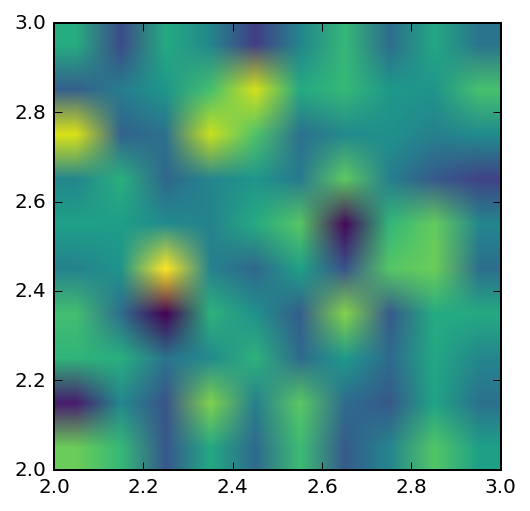

In [129]:
block = np.random.randn(10,10)

plt.imshow(block,extent=(0,1,0,1))
plt.imshow(block,extent=(2,3,2,3))

plt.savefig("/tmp/imshow_test.pdf")

In [68]:
fig = plt.figure()
prof = plt.Axes(fig, (0,0,1,1))
plt.sca(prof)
plt.plot(ps, d[0,:])


ValueError: Axes instance argument was not found in a figure.